In [16]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

# DATA READING

data_dir = "./experiments/participants/"
data_glob = data_dir + "p3_[0-9]_*session.csv"

full_data = [pd.read_csv(f) for f in glob.glob(data_glob)]
session_data = [d for d in full_data]# Take only the first 250 trials
config_files = [f.replace("_session.csv", "_config.json") for f in glob.glob(data_glob)]

config_data = []

for f in config_files:
    with open(f, 'rb') as infile:
        read = json.load(infile)
        config_data.append(read)

data = list(zip(config_data, session_data))

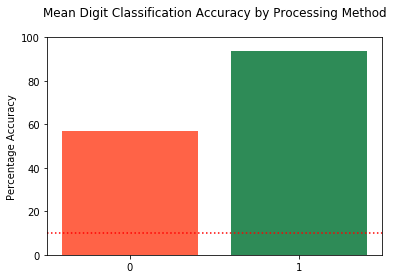

In [17]:
fig, axes = plt.subplots(1)

colors = ['tomato', 'seagreen']

# d[0] corresponds to config, d[1] corresponds to session data
accuracies = [sum(d[1]['digit'] == d[1]['keypress'])/len(d[1]) * 100 for d in data]
labels = [f"{d[0]['CONDITION']}" for d in data]
          
plt.bar(range(len(data)), accuracies, align='center', color=colors, tick_label=labels)
plt.ylim((0,100))
plt.title("Mean Digit Classification Accuracy by Processing Method\n{}".format(""))
plt.ylabel("Percentage Accuracy")
plt.axhline(10, color='r', linestyle=':')

Text(0, 0.5, 'Time to Classification (seconds)')

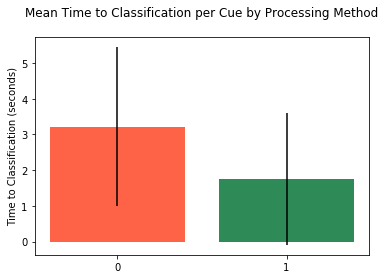

In [18]:
fig, axes = plt.subplots(1)

# d[0] corresponds to config, d[1] corresponds to session data
times = [d[1]['cuetime'].mean() for d in data]
stds = [d[1]['cuetime'].std() for d in data]
          
plt.bar(range(len(data)), times, align='center', color=colors, tick_label=labels, yerr=stds)
plt.title("Mean Time to Classification per Cue by Processing Method\n{}".format(""))

plt.ylabel("Time to Classification (seconds)")

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

fig, axes = plt.subplots(1, len(data), figsize=(12, 4))

confusion_matrices = [confusion_matrix(d[1]['digit'],
                                       d[1]['keypress'],
                                       labels=range(10))
                      for d in data]

global_max = np.max([np.max(cm) for cm in confusion_matrices])

for i in range(len(data)):
    sn.heatmap(confusion_matrices[i],
               annot=True, 
               ax=axes[i],
               vmin=0,
               vmax=global_max,
               cbar=False)
    axes[i].set(xlabel='Predicted digit', ylabel='True digit', title="Confusion matrix, {}".format(labels[i]))

fig.suptitle("")

ModuleNotFoundError: No module named 'sklearn'

Text(0.5, 0.98, 'Rolling Mean (window = 25)')

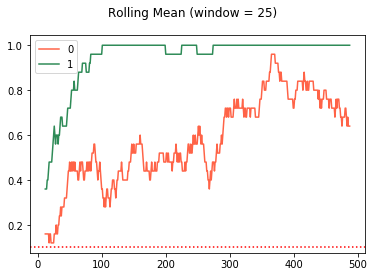

In [21]:
correct = [full_data[i]["digit"] == full_data[i]["keypress"] for i in range(len(data))]

fig, ax = plt.subplots(1)

for i in range(len(correct)):
    plot_data = correct[i].rolling(window=25, center=True).mean()
    plt.plot(plot_data, c=colors[i], label=data[i][0]["CONDITION"])

plt.legend()
plt.axhline(0.1, c='red', linestyle=':')

    
fig.suptitle("Rolling Mean (window = 25)")